In [18]:
### ELABORAÇÃO DO MODELO PREDITIVO ###


# Importar as bibliotecas necessárias
import pandas as pd

# Carregamento do arquivo
arquivo = 'churn_challenge_data2.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

In [19]:
dataset.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,61,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,56,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,58,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,60,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,57,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   churn          100000 non-null  int64  
 1   actvsubs       100000 non-null  int64  
 2   adjmou         100000 non-null  float64
 3   adjqty         100000 non-null  int64  
 4   adjrev         100000 non-null  float64
 5   adults         76981 non-null   float64
 6   area           99960 non-null   object 
 7   asl_flag       100000 non-null  object 
 8   attempt_Mean   100000 non-null  float64
 9   avg3mou        100000 non-null  int64  
 10  avg3qty        100000 non-null  int64  
 11  avg3rev        100000 non-null  int64  
 12  avg6mou        97161 non-null   float64
 13  avg6qty        97161 non-null   float64
 14  avg6rev        97161 non-null   float64
 15  avgmou         100000 non-null  float64
 16  avgqty         100000 non-null  float64
 17  avgrev         100000 non-null

In [ ]:
# Pré-seleção das variáveis que irão compor o modelo

## As seguintes variáveis foram pré-selecionadas para compor o modelo:
# churn: Instance of churn between 31-60 days after observation date
# mou_Mean: Mean number of monthly minutes of use
# change_mou: Percentage change in monthly minutes of use vs previous three month average
# change_rev: Percentage change in monthly revenue vs previous three month average
# custcare_Mean: Mean number of customer care calls
# ccrndmou_Mean: Mean rounded minutes of use of customer care calls
# months: Total number of months in service
# actvsubs: Number of active subscribers in household
# asl_flag: Account spending limit
# totcalls: Total number of calls over the life of the customer
# totmou: Total minutes of use over the life of the customer
# totrev: Total revenue
# avgrev: Average monthly revenue over the life of the customer
# avgmou: Average monthly minutes of use over the life of the customer
# avgqty: Average monthly number of calls over the life of the customer
# avg3mou: Average monthly minutes of use over the previous three months
# avg3qty: Average monthly number of calls over the previous three months
# avg3rev: Average monthly revenue over the previous three months
# area: Geographic area
# adults: Number of adults in household
# eqpdays: Number of days (age) of current equipment

In [75]:
# Elaboração do dataset com as variáveis de interesse

dataset1 = pd.DataFrame(data = dataset, columns = ['churn','actvsubs','adults','area','asl_flag','avg3mou','avg3qty',
                                                  'avg3rev','avgmou','avgqty','avgrev','ccrndmou_Mean','change_mou',
                                                  'change_rev','custcare_Mean','eqpdays','months','mou_Mean','totcalls',
                                                  'totmou','totrev'])
dataset1.head()

,churn,actvsubs,adults,area,asl_flag,avg3mou,avg3qty,avg3rev,avgmou,avgqty,...,ccrndmou_Mean,change_mou,change_rev,custcare_Mean,eqpdays,months,mou_Mean,totcalls,totmou,totrev
0,1,1,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,272,116,30,83.37,32.69,...,0.000000,-157.25,-18.9975,0.000000,361.0,61,219.25,1652,4228.00000,1504.62
1,0,1,1.0,CHICAGO AREA,N,305,158,40,479.40,265.89,...,6.333333,532.25,50.9875,1.666667,240.0,56,482.75,14654,26400.00000,2851.68
2,1,1,2.0,GREAT LAKES AREA,N,12,7,17,433.98,140.86,...,0.000000,-4.25,0.0000,0.000000,1504.0,58,10.25,7903,24385.05333,2155.91
3,0,1,4.0,CHICAGO AREA,N,8,3,38,63.23,30.81,...,0.000000,-1.50,0.0000,0.000000,1812.0,60,7.50,1502,3065.00000,2000.90
4,0,1,1.0,NEW ENGLAND AREA,N,558,191,55,249.38,79.50,...,15.000000,38.50,0.0000,8.666667,434.0,57,570.50,4485,14028.00000,2181.12


In [22]:
# Limpeza dos dados

## Verificando colunas com valores nulos - O dataset será processado de acordo com as hipóteses a serem testadas
dataset1.isnull().sum()

churn                0
actvsubs             0
adults           23019
area                40
asl_flag             0
avg3mou              0
avg3qty              0
avg3rev              0
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
totcalls             0
totmou               0
totrev               0
dtype: int64

In [23]:
## Verificando a presença de linhas duplicadas

print(any(dataset1.duplicated()))

## Deletando as linhas duplicadas - retirar o # caso o resultado do comando anterior seja 'true'
## dataset = dataset.drop_duplicates()

False


In [76]:
## Deletando valore nulos
dataset2 = dataset1.dropna(axis=0, how='any')
dataset2.isnull().sum()

churn            0
actvsubs         0
adults           0
area             0
asl_flag         0
avg3mou          0
avg3qty          0
avg3rev          0
avgmou           0
avgqty           0
avgrev           0
ccrndmou_Mean    0
change_mou       0
change_rev       0
custcare_Mean    0
eqpdays          0
months           0
mou_Mean         0
totcalls         0
totmou           0
totrev           0
dtype: int64

In [77]:
## Transformando variáveis categóricas em valores numéricos para a matriz de correlação e aplicação no modelo

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
area_num = label_encoder.fit_transform(dataset2['area'])
onehot_encoder = OneHotEncoder(sparse=False)
area_inteiros = area_num.reshape(len(area_num),1)
area_binarios = onehot_encoder.fit_transform(area_inteiros)
dataset2['area'] = area_binarios

<ipython-input-77-5a2573d494fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['area'] = area_binarios


In [78]:
label_encoder = LabelEncoder()
churn_num = label_encoder.fit_transform(dataset2['churn'])
onehot_encoder = OneHotEncoder(sparse=False)
churn_inteiros = churn_num.reshape(len(churn_num),1)
churn_binarios = onehot_encoder.fit_transform(churn_inteiros)
dataset2['churn'] = churn_binarios

<ipython-input-78-c4f7df5a7e80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['churn'] = churn_binarios


In [79]:
label_encoder = LabelEncoder()
asl_num = label_encoder.fit_transform(dataset2['asl_flag'])
onehot_encoder = OneHotEncoder(sparse=False)
asl_inteiros = asl_num.reshape(len(asl_num),1)
asl_binarios = onehot_encoder.fit_transform(asl_inteiros)
dataset2['asl_flag'] = asl_binarios

<ipython-input-79-2dc2274cdca3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['asl_flag'] = asl_binarios


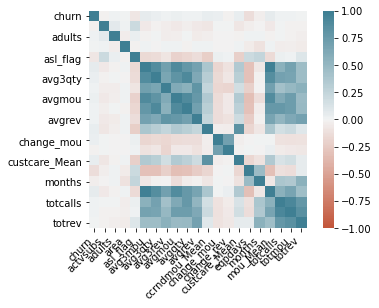

In [52]:
## Criar um gráfico com uma matriz de correlação

import seaborn as sns

corr = dataset2.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
## Seleção de variáveis para compor o modelo:

# churn: Instance of churn between 31-60 days after observation date
# change_rev: Percentage change in monthly revenue vs previous three month average
# ccrndmou_Mean: Mean rounded minutes of use of customer care calls
# months: Total number of months in service
# actvsubs: Number of active subscribers in household
# asl_flag: Account spending limit
# totcalls: Total number of calls over the life of the customer
# adults: Number of adults in household
# avg3mou: Average monthly minutes of use over the previous three months
# area: Geographic area

In [80]:
## Criando um novo dataframe para a modelagem

dataset2 = pd.DataFrame(data = dataset2, columns = ['churn','actvsubs','adults','area','asl_flag','avg3mou',
                                                  'ccrndmou_Mean','change_rev','months','totcalls'])
dataset2.head()

,churn,actvsubs,adults,area,asl_flag,avg3mou,ccrndmou_Mean,change_rev,months,totcalls
0,0.0,1,1.0,0.0,1.0,272,0.000000,-18.9975,61,1652
1,1.0,1,1.0,0.0,1.0,305,6.333333,50.9875,56,14654
2,0.0,1,2.0,0.0,1.0,12,0.000000,0.0000,58,7903
3,1.0,1,4.0,0.0,1.0,8,0.000000,0.0000,60,1502
4,1.0,1,1.0,0.0,1.0,558,15.000000,0.0000,57,4485


In [81]:
## Filtrando o dataframe para a composição do melhor modelo - variáveis selecionadas após testes dos modelos

dataset2 = dataset2.drop('ccrndmou_Mean',1)
dataset2 = dataset2.drop('actvsubs',1)
dataset2 = dataset2.drop('adults',1)
dataset2 = dataset2.drop('asl_flag',1)
dataset2

,churn,area,avg3mou,change_rev,months,totcalls
0,0.0,0.0,272,-18.997500,61,1652
1,1.0,0.0,305,50.987500,56,14654
2,0.0,0.0,12,0.000000,58,7903
3,1.0,0.0,8,0.000000,60,1502
4,1.0,0.0,558,0.000000,57,4485
...,...,...,...,...,...,...
99981,0.0,0.0,116,0.000000,30,1052
99984,0.0,0.0,482,0.000000,27,1598
99985,1.0,0.0,715,-1.993333,30,5467
99986,0.0,0.0,128,0.000000,30,2686


In [82]:
## Separando dados de treino e validação

from sklearn.model_selection import train_test_split

x = dataset2.drop('churn',1)

y = dataset2['churn']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3)

In [83]:
## Treinando os modelos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

GradientBoostingClassifier()

In [84]:
## Validando os modelos

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictLR = modelLR.predict(x_valid)
print('Logistic Regression: \n', classification_report(predictLR, y_valid))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_valid))

predictRF = modelRF.predict(x_valid)
print('Random Forest Classifier : \n', classification_report(predictRF, y_valid))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_valid))

predictGB = modelGB.predict(x_valid)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_valid))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_valid))

Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.38      0.54      0.44      7817
         1.0       0.69      0.53      0.60     15074

    accuracy                           0.54     22891
   macro avg       0.53      0.54      0.52     22891
weighted avg       0.58      0.54      0.55     22891

Logistic Regression Accuracy:  0.5361932637281027
Random Forest Classifier : 
               precision    recall  f1-score   support

         0.0       0.54      0.56      0.55     10953
         1.0       0.58      0.57      0.57     11938

    accuracy                           0.56     22891
   macro avg       0.56      0.56      0.56     22891
weighted avg       0.56      0.56      0.56     22891

Random Forest Classifier Accuracy:  0.5607443973614085
Gradient Boost Classifier : 
               precision    recall  f1-score   support

         0.0       0.54      0.58      0.56     10413
         1.0       0.63      0.59      0.61     12

In [ ]:
## Melhor modelo considerando as variáveis preditivas testadas:

## Método: Gradient Boost Classifier

## Variáveis:
# change_rev: Percentage change in monthly revenue vs previous three month average
# months: Total number of months in service
# totcalls: Total number of calls over the life of the customer
# avg3mou: Average monthly minutes of use over the previous three months
# area: Geographic area

## Parâmetros de avaliação:
# Accuracy: 0.59
# Precision: 0.63
# Recall: 0.59